In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data_train = pd.read_csv("C:/Users/jaswa/Downloads/loan_sanction_train.csv")
data_train = data_train.drop(['Loan_ID'], axis = 1)
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
data_test = pd.read_csv("C:/Users/jaswa/Downloads/loan_sanction_test.csv")
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)

C:\Users\jaswa\AppData\Local\Temp\ipykernel_15132\1792485722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
C:\Users\jaswa\AppData\Local\Temp\ipykernel_15132\1792485722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [7]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


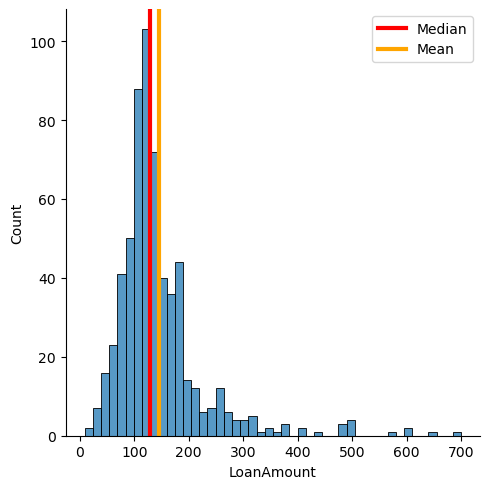

In [8]:
sns.displot(data_train['LoanAmount'])
plt.axvline(x=data_train['LoanAmount'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['LoanAmount'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

In [9]:
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)

C:\Users\jaswa\AppData\Local\Temp\ipykernel_15132\933572178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
C:\Users\jaswa\AppData\Local\Temp\ipykernel_15132\933572178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

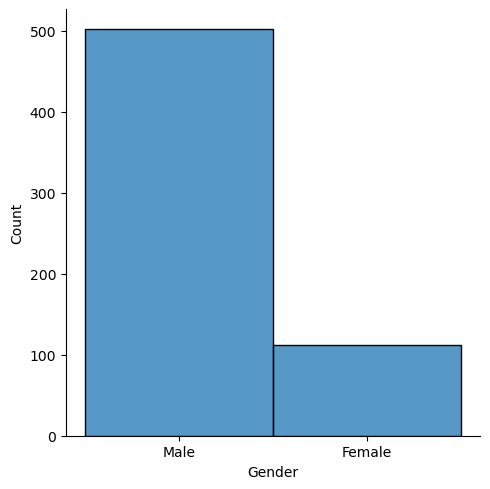

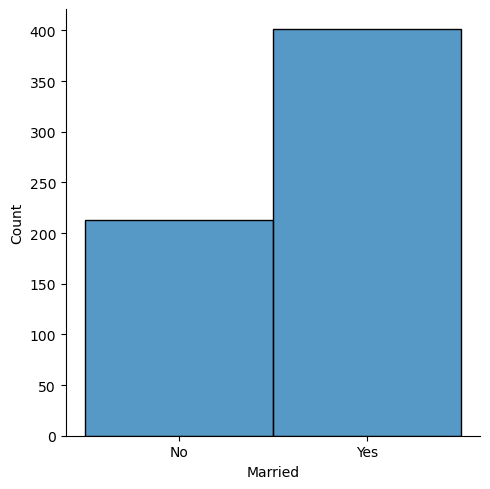

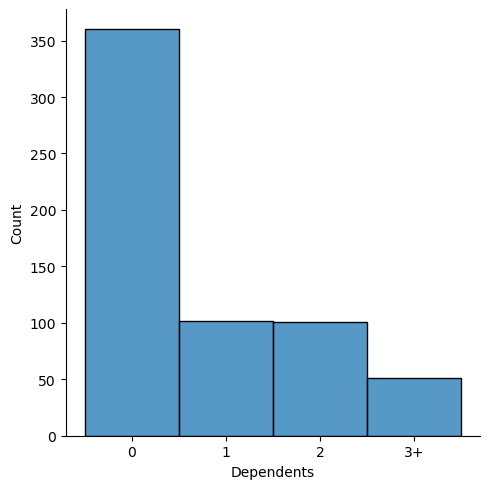

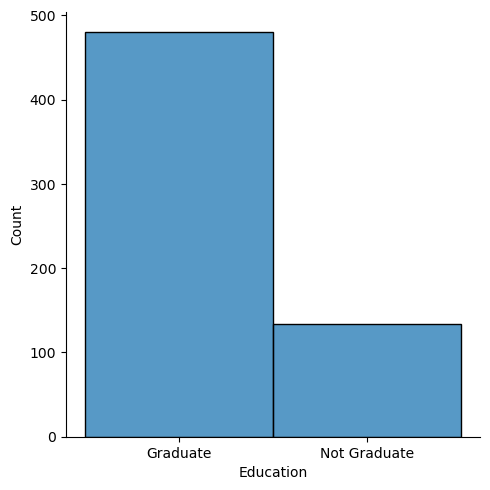

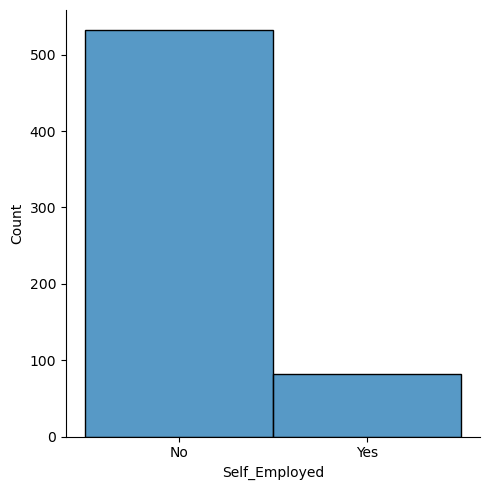

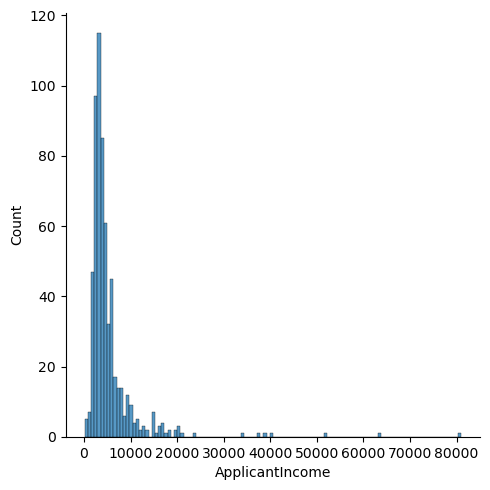

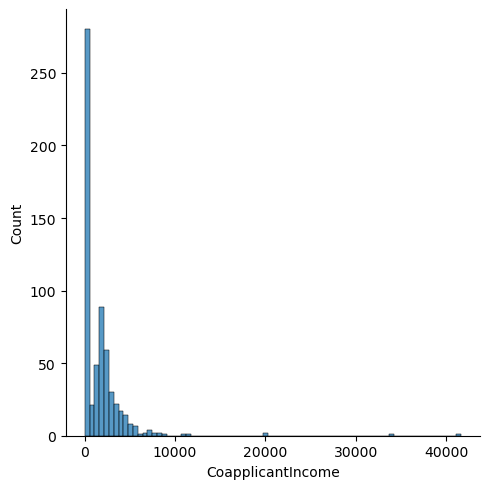

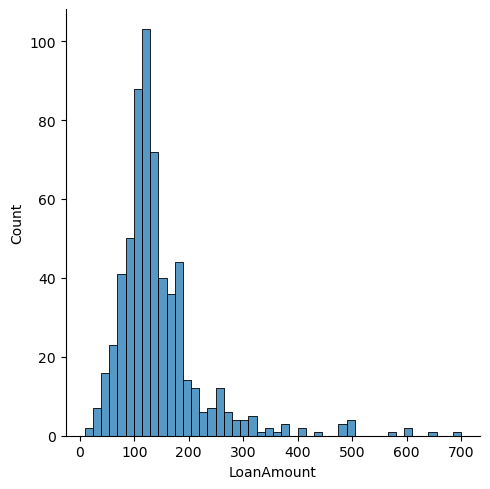

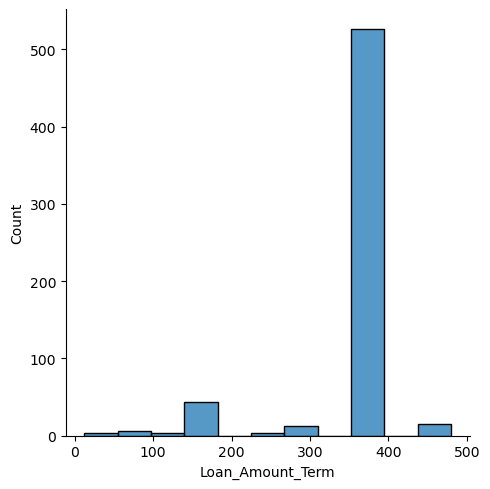

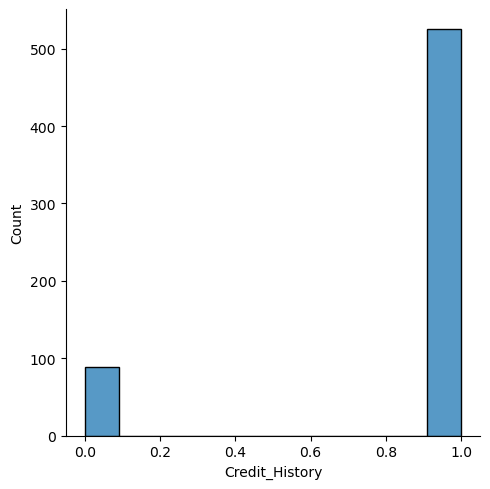

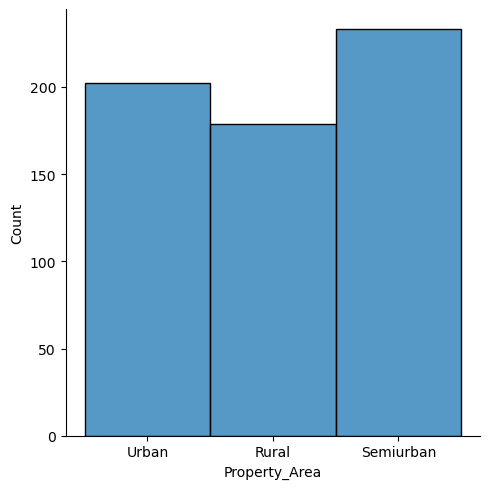

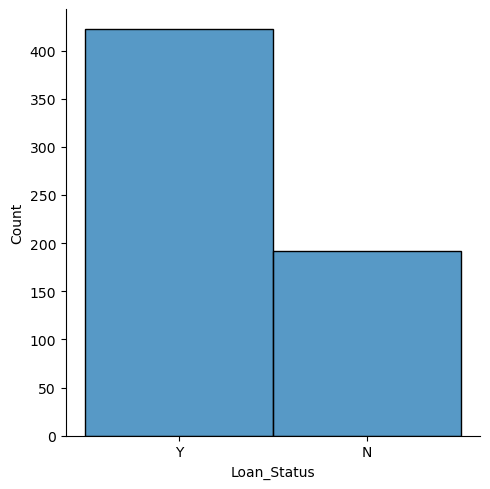

In [10]:
for _ ,column in enumerate(data_train.columns):
    sns.displot(data_train[column])

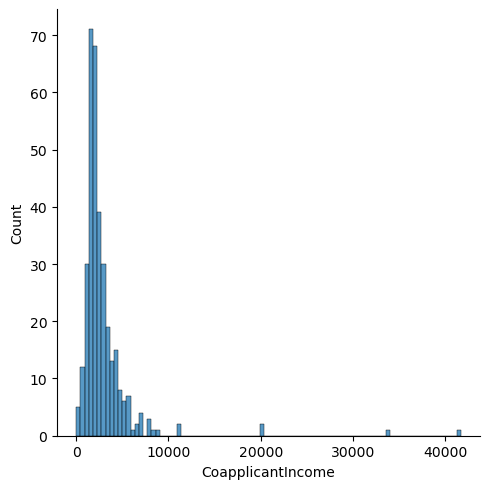

In [11]:
sns.displot(data_train[data_train['CoapplicantIncome']>0]['CoapplicantIncome'])

In [12]:
data_train = data_train.drop(['CoapplicantIncome'], axis=1)

In [13]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [14]:
dummies = pd.get_dummies(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_train = pd.concat([dummies, data_train.drop(['Gender','Married','Education','Self_Employed', 'Dependents','Property_Area',], axis=1)], axis=1)

In [15]:
data_train

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,False,True,True,False,True,False,True,False,False,False,True,True,False,False,False,5849,128.0,360.0,1.0,Y
1,False,True,False,True,True,False,True,False,True,False,False,False,True,False,False,4583,128.0,360.0,1.0,N
2,False,True,False,True,True,False,False,True,False,False,True,True,False,False,False,3000,66.0,360.0,1.0,Y
3,False,True,False,True,False,True,True,False,False,False,True,True,False,False,False,2583,120.0,360.0,1.0,Y
4,False,True,True,False,True,False,True,False,False,False,True,True,False,False,False,6000,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,2900,71.0,360.0,1.0,Y
610,False,True,False,True,True,False,True,False,True,False,False,False,False,False,True,4106,40.0,180.0,1.0,Y
611,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,8072,253.0,360.0,1.0,Y
612,False,True,False,True,True,False,True,False,False,False,True,False,False,True,False,7583,187.0,360.0,1.0,Y


In [16]:
label_encoder = LabelEncoder()
data_train['Loan_Status'] = label_encoder.fit_transform(data_train['Loan_Status'])

In [17]:
data_train['Loan_Status'] = data_train['Loan_Status'].astype(int)

In [18]:
corr_train = data_train.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education_Graduate         0.085884
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
Education_Not Graduate    -0.085884
Married_No                -0.091478
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

In [19]:
data_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

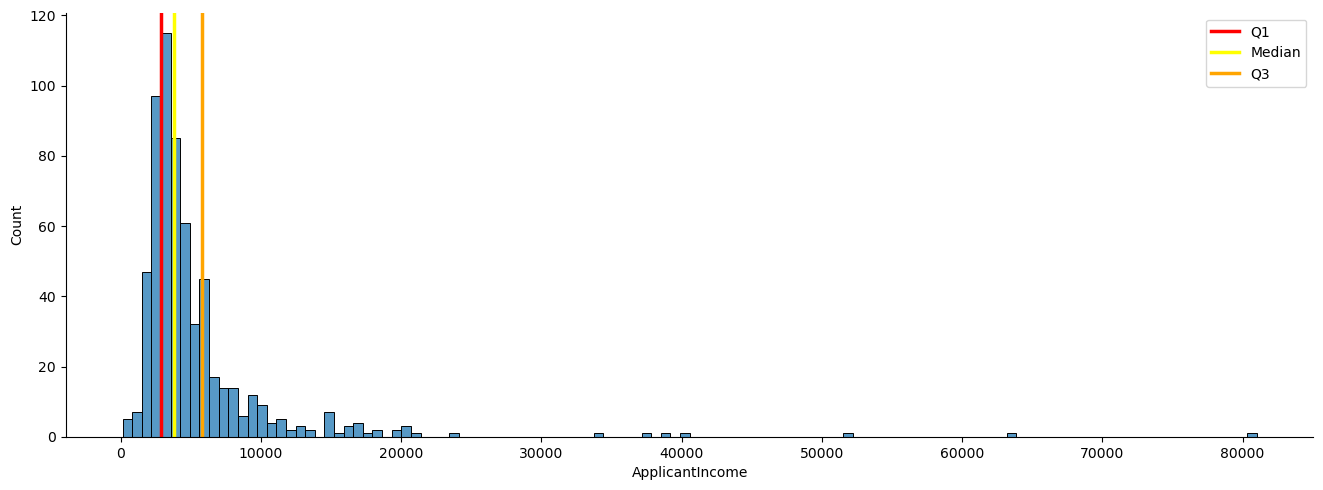

In [20]:
sns.displot(data_train['ApplicantIncome'],aspect=8/3)
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],25),
            color='red',linewidth=2.5, label='Q1')
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],50),
            color='yellow',linewidth=2.5, label='Median')
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],75),
            color='orange',linewidth=2.5, label='Q3')
plt.legend()

In [21]:
data_train['income_cat'] = pd.cut(data_train['ApplicantIncome'],bins=[149.0,2870.5,3812.5,5795.0,81000.0],labels=[1,2,3,4])

In [22]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(data_train, data_train['income_cat']):
    strat_train = data_train.loc[train_index]
    strat_train_test = data_train.loc[test_index]
data_train = strat_train
data_train_test = strat_train_test

In [23]:
data_train = data_train.drop(['income_cat'],axis=1)
data_train_test = data_train_test.drop(['income_cat'], axis=1)

In [24]:
data_train_X, data_train_y, data_train_test_X, data_train_test_y = data_train.drop(['Loan_Status'],axis=1), data_train['Loan_Status'], data_train_test.drop(['Loan_Status'],axis=1),data_train_test['Loan_Status']

In [25]:
data_train_X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
545,False,True,False,True,True,False,True,False,True,False,False,True,False,False,False,2768,155.0,360.0,1.0
424,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False,14880,96.0,360.0,1.0
213,False,True,False,True,False,True,False,True,True,False,False,False,False,False,True,5703,130.0,360.0,1.0
162,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,3089,121.0,360.0,0.0
256,False,True,True,False,False,True,True,False,True,False,False,True,False,False,False,6045,115.0,360.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,False,True,False,True,False,True,True,False,True,False,False,False,True,False,False,1958,131.0,360.0,1.0
135,False,True,False,True,True,False,True,False,False,True,False,False,False,False,True,4000,290.0,360.0,1.0
237,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,3463,122.0,360.0,1.0
84,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,3988,50.0,240.0,1.0


In [26]:
scaler = StandardScaler()
data_train_X, data_train_test_X = scaler.fit_transform(data_train_X),scaler.fit_transform(data_train_test_X)

In [27]:
log_reg = LogisticRegression()
log_reg.fit(data_train_X, data_train_y)

LogisticRegression()

In [28]:
bag_log_clf = BaggingClassifier(log_reg, n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True)
bag_log_clf.fit(data_train_X, data_train_y)

BaggingClassifier(estimator=LogisticRegression(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [29]:
y_train_predict = cross_val_predict(bag_log_clf, data_train_X, data_train_y, cv= 3)
'Log Classifier Bag - Train score: {}'.format(f1_score(y_train_predict, data_train_y))

'Log Classifier Bag - Train score: 0.8611111111111112'

In [30]:
y_train_test_predict = bag_log_clf.predict(data_train_test_X)
'Log Classifier Bag - Test score: {}'.format(f1_score(y_train_test_predict, data_train_test_y))

'Log Classifier Bag - Test score: 0.8881118881118881'

In [31]:
def show_evo_train_test(model, data_train_X, data_train_y, data_test_X, data_test_y):
    train_errors, test_errors = [], []
    label_encoder = LabelEncoder()
    for i in range(5,len(data_train_X)):
        if data_train_y[:i].nunique() > 1:
            model.fit(data_train_X[:i], data_train_y[:i])
            y_train_pred = model.predict(data_train_X[:i])
            y_test_pred = model.predict(data_test_X)
            train_errors.append(f1_score(y_train_pred, data_train_y[:i]))
            test_errors.append(f1_score(y_test_pred, data_test_y))
    plt.plot(np.sqrt(train_errors),'r-', linewidth=2,label='train')
    plt.plot(np.sqrt(test_errors),'b-', linewidth=2,label='test')
    plt.legend()

In [32]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(data_train_X, data_train_y)

DecisionTreeClassifier(max_depth=3)

In [33]:
bag_dt_clf = BaggingClassifier(dt_clf, n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True)
bag_dt_clf.fit(data_train_X, data_train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

In [34]:
y_train_predict2 = cross_val_predict(bag_dt_clf, data_train_X, data_train_y, cv= 3)
'Decision Tree Bag - Train score: {}'.format(f1_score(y_train_predict2, data_train_y))

'Decision Tree Bag - Train score: 0.867579908675799'

In [35]:
y_train_test_predict2 = bag_dt_clf.predict(data_train_test_X)
'Decision Tree Bag - Test score: {}'.format(f1_score(y_train_test_predict2, data_train_test_y))

'Decision Tree Bag - Test score: 0.896551724137931'

In [36]:
svc_clf = SVC()
svc_clf.fit(data_train_X, data_train_y)

SVC()

In [37]:
bag_svc_clf = BaggingClassifier(svc_clf, n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1, oob_score=True)
bag_svc_clf.fit(data_train_X, data_train_y)

BaggingClassifier(estimator=SVC(), max_samples=100, n_estimators=500, n_jobs=-1,
                  oob_score=True)

In [38]:
y_train_predict3 = cross_val_predict(bag_svc_clf, data_train_X, data_train_y, cv= 3)
'SVC Bag Classifier - Train score: {}'.format(f1_score(y_train_predict3, data_train_y))

'SVC Bag Classifier - Train score: 0.858877086494689'

In [39]:
y_train_test_predict3 = bag_svc_clf.predict(data_train_test_X)
'SVC Bag Classifier - Test score: {}'.format(f1_score(y_train_test_predict3, data_train_test_y))

'SVC Bag Classifier - Test score: 0.8972602739726028'

In [41]:
voting_clf = VotingClassifier(estimators=[('log',bag_log_clf),('dt',bag_dt_clf),('svc',bag_svc_clf)], voting='soft')
voting_clf.fit(data_train_X, data_train_y)

VotingClassifier(estimators=[('log',
                              BaggingClassifier(estimator=LogisticRegression(),
                                                max_samples=100,
                                                n_estimators=500, n_jobs=-1,
                                                oob_score=True)),
                             ('dt',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                                max_samples=100,
                                                n_estimators=500, n_jobs=-1,
                                                oob_score=True)),
                             ('svc',
                              BaggingClassifier(estimator=SVC(),
                                                max_samples=100,
                                                n_estimators=500, n_jobs=-1,
                                                oob_score=True))],
                 voting='soft')

In [42]:
voting_y_train_pred = voting_clf.predict(data_train_X)
f1_score(voting_y_train_pred, data_train_y)

0.8689024390243902

In [43]:
voting_y_test_pred = voting_clf.predict(data_train_test_X)
f1_score(voting_y_test_pred, data_train_test_y)

0.896551724137931